In [51]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pickle
import datetime

In [52]:

def true_F(D_arr, beta):
    N_D = len(D_arr)
    D_min = np.min(D_arr)
    beta_D_arr_off = beta * (D_arr - D_min)
    F_true = -1/beta * np.log(np.sum(np.exp(-beta_D_arr_off))) + D_min + 1/beta * np.log(N_D)
    return F_true

def area_approx_F(D_min, D_max_range, N_D, beta):
    min_beta_D_arr = beta * D_min
    x_max = beta * D_max_range - min_beta_D_arr
    F_est = -1/beta * np.log(N_D/x_max * (1 - np.exp(-x_max))) + D_min + 1/beta * np.log(N_D)
    return F_est



In [53]:
D_max_range = 1000
N_D = 100
D_arr = np.random.uniform(np.random.uniform(0.0, D_max_range/2), D_max_range, N_D)

In [54]:
beta1 = 1e-5
beta_D_arr = beta1 * D_arr
min_beta_D_arr = np.min(beta_D_arr)
x_max = beta1 * D_max_range - min_beta_D_arr
beta_D_arr_off = beta1 * D_arr - min_beta_D_arr
F_true = true_F(D_arr, beta1)
F_est = area_approx_F(np.min(D_arr), D_max_range, N_D, beta1)
print(f"x_max:{x_max}")
print(f"beta_D_arr_off_max:{np.max(beta_D_arr_off)}")
print(f"True F:{F_true}\tArea based F:{F_est}")


x_max:0.009810383212671093
beta_D_arr_off_max:0.00955835333795883
True F:457.2377257324406	Area based F:509.0798246097402


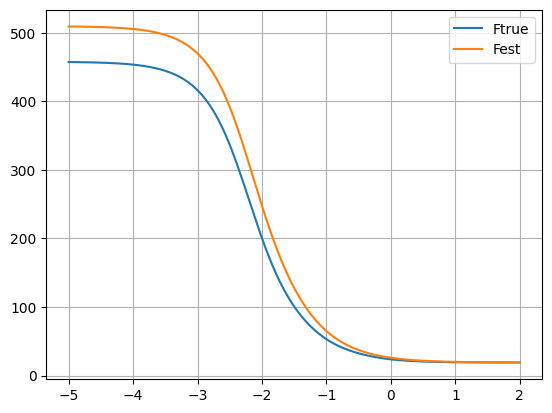

In [55]:
beta0 = 1e-5
betaf = 1e2
beta_grow = 1.1
b = beta0
F_true_arr = []
F_est_arr = []
b_arr = []
while b <= betaf:
    F_true = true_F(D_arr, b)
    F_est = area_approx_F(np.min(D_arr), D_max_range, N_D, b)
    b_arr.append(b)
    F_true_arr.append(F_true)
    F_est_arr.append(F_est)
    b = b * beta_grow

plt.plot(np.log(b_arr)/np.log(10), F_true_arr, label='Ftrue')
plt.plot(np.log(b_arr)/np.log(10), F_est_arr, label='Fest')
plt.grid()
plt.legend()
plt.show()